- Student 1 Name: Ans Imran
- Student 2 Name: Ahmad Hassan

In [145]:
%matplotlib inline
import matplotlib as mt
import matplotlib.pyplot as plt
import numpy as np

# Update the matplotlib configuration parameters:
mt.rcParams.update({'font.size': 13, 'font.family': 'serif'})

# Minimization

Create a python Function called Func_1(x) $= (x^4-61x^3+1160x^2-7100x+6.e3)*e^{(-\frac{x}{10.})}$

In [146]:
def Func_1(x):
    f = ( (x**4) - 61*(x**3) + 1160*(x**2) - 7100*x + 6e3 )*np.exp(-x/10)
    return f
  



Define x as an array with lineary spaced values in the range [0,50)

In [147]:
x = np.arange(0,50,1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

plot Func_1(x) in the range [0,50]

Text(0, 0.5, 'f(x)')

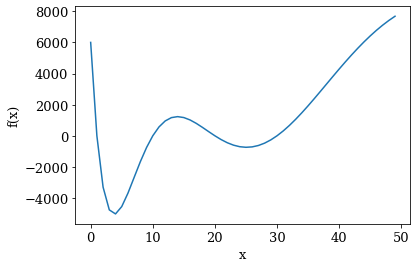

In [148]:
plt.plot(x, Func_1(x))
plt.xlabel('x')
plt.ylabel('f(x)')

Now we will try to find the minimum. Graphically determines the (approximated) miminimum:
HOw many minima ?
ANSWER : 
What are the approximate values ?
ANSWSER:


#### In the above range, we can graphically see 2 minima.

#### The minima which appears to be a GLOBAL minima is somewhere in the domain x = (2.5, 5).

#### The second minima is somewhere in the domain x = (22,28)

Now we will try to find the minima using the 3 points bissection bracketing rule $[x_1, x_2,x_3]$, so that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$ so that we are sure a minimum exists between $x_1$ and $x_3$.


Write a python function, called " Minim_Func_1 ", that finds the minimum of function Func_1(x), starting from a triplet (x1,x2,x3) defined as above.

Your code must:

* take x1,x2,X3 as an arguement as well as:  $\epsilon$, the desired accuracy
* check first that $F(x_2)< F(x_1)$ and $F(x_2)<F(x_3)$
* iterate to find the minimum 
* Make sure than no more than Nitermax(=1000) iterations are done.

The function must return three number :

The value of the found minimum, the accuracy, the number of steps.







1st method : The new point to consider will be the center  of the largest segment.


In [149]:
def Minim_Func_1(x1,x2,x3, eps, f):
    '''
    f: The function, whose minima (in a specified range), we want to find. 
    '''
    i = 0         # it'll count the iterations of the loop
    m = 0         # it'll act as the midpoint of the smallest of the two intervals inetrval
    q = True

    while q:
        fx1 = f(x1)
        fx2 = f(x2)
        fx3 = f(x3)
    
        if fx2 < fx1 and fx2 < fx3:
            a = 1                  # this statement has no function, it's just a space filler.
        else:
            print('fx2 < fx1  AND  fx2 < fx3 is FALSE')
            q = False
    
        L12 = x2 - x1              # calculating the size of the left interval
        L23 = x3 - x2              # calculating the size of the right interval
    
        if L12 >= L23:             # ' >= ' is necessary, because the two intervals could have the exactly the same size
            m  = (x1 + x2)/2       # the midpoint of the choosen interval
            fx = f(m)
            if fx < fx1 and fx > fx2:    #moving the left edge
                x1 = m
            elif fx < fx1 and fx < fx2:
                if fx1 < fx3:            # if ' fx1 < fx3 ' then the new triplet is (x1,m,x2). replaced x3 by x2
                    x1 = x1
                    x3 = x2
                    x2 = m
                elif fx3 < fx1:          # if ' fx3 < fx1 ' then the new triplet is (m,x2,x3). replaced x1 by m
                    x3 = x3
                    x1 = m
                    x2 = x2

        elif L23 > L12 :
            m = (x2 + x3)/2
            fx = f(m)
            if fx > fx2 and fx < fx3:    # moving right edge
                x3 = m
            elif fx < fx2 and fx < fx3:
                if fx3 < fx1:            # if ' fx3 < fx1 ' then the new triplet is (x2,m,x3). replaced x1 by x2
                    x1 = x2
                    x2 = m
                    x3 = x3
                elif fx1 < fx3:          # if ' fx1 < fx3 ' then the new triplet is (x1,x2,m). replaced x3 by m
                    x3 = m
                    x1 = x1
                    x2 = x2
        
        accuracy = abs(x3 - x1) 
        if accuracy <= eps or i == 1000:
            q = False
        
        i = i+1
        
    return [f(x2), accuracy, i+1, x2]
        

In [150]:
Minim_Func_1(0, 5e0, 10e0, 1e-6, Func_1)

[-5039.139504720325, 5.960464477539062e-07, 43, 3.774707615375519]

Plot the number of iterations needed to get an accuracy , abs(x3-x1) , of 0.01, 0.001, 1.e-3,1.e-4, 1.e-5,1.e-6)



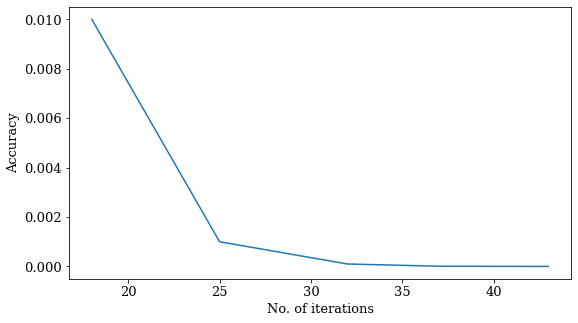

In [151]:
Accuracy_list = [0.01, 0.001, 1e-3, 1e-4, 1e-5, 1e-6]
iterations_list = []

for i in Accuracy_list:
    mini, accur, iterations, a = Minim_Func_1(0,5e0,10e0, i, Func_1)
    iterations_list.append(iterations)

plt.figure(figsize=(9,5))
plt.xlabel('No. of iterations')
plt.ylabel('Accuracy')
plt.plot(iterations_list, Accuracy_list)

# High accuracy means a small value of abs(x3-x1).
## so, the accuracy is indeed increasing in the above graph.
# High Accuracy corresponds to low abs(x3-x1)

Plot the number and accuracy of the solution  as a function of the number of iterations. You can use the python matplotlib funcion : plt.semilogy

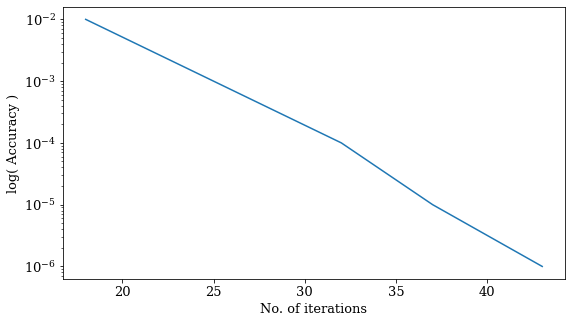

In [152]:

plt.figure(figsize=(9,5))
plt.xlabel('No. of iterations')
plt.ylabel('log( Accuracy )')
plt.semilogy(iterations_list, Accuracy_list)



## A superlinear method.

We use [x1,x2,x3] as usual to bracket the minimum, but now point x4 will be the chose as the minimum of the parabola that passes through the 3 points [x1,x2,x3] with values [f(x1),f(x2),fx(3)] 
Note :The  the minimum of the parabola that passes trhough the 3 points f(a),f(b),fx(c) is located at abscissa X such that =

$
X=b-0.5\frac{(b-a)^2(f(b)-f(c))-(b-c)^2(f(b)-f(a))}{(b-a)(f(b)-f(c))-(b-c)(f(b)-f(a))}
$

Build a minimisation function called : Minim_Parab_Func_1 that search for the minimum using parabolic descent.

Note 1: for the method to be more efficient than bissection you must make sure at each time step that the new interval has a width smaller than 0.5 of the previoux step.
So a good way to do that is to compute X4 using the formula above (X=) that is the best guess for the next minimum and take the smallest segment that brackets the minimum wihin points [x1,x2,x3,x4,0.5*(x1+x3)].



For this we can use the two following methods :
* np.sort(S), that sort in ascending order a list of values contained in a list S
* V.argmin() that returns the index of the smallest element in a array (numpy array) V.
* to transform a list in a numpy array you can use : np.array(L) where L is a list.
Example : L=[1,2,3] is a list and np.array(L) returns an array with the same elements as in L

Note 2: Make sure that your interval is ALWAYS equilibrated, I mean that x2-x1 is always comparable to x3-x2 (not necessarily equal), to avoid the *bad* situation where one of the interval is much smaller than the other one.

Note 3 : To check that your minimization process is performing well,  I suggest that at each step you print x1,x2,x3 to check that everything is occuring properly.


In [153]:
def parabolic_x(x1, x2, x3, f):
    '''
    This function returns the minima of a parabola, that passes through the points f(x1), f(x2) & f(x3).
    '''
    
    fx1 = f(x1)
    fx2 = f(x2)
    fx3 = f(x3)
    
    o = x2 - 0.5*( (( (x2-x1)**2 ) * (fx2 - fx3))  -  (( (x2-x3)**2 ) * ( fx2 - fx1 ))) / ( ((x2-x1) * (fx2 - fx3))  -  ((x2-x3) * ( fx2 - fx1 )))
    return o



def Minim_Parab_Func_1(x1, x2, x3, eps, f):
    '''
    This function returns the minima (in a specified range), of a given function 'f', using parabolic interpolation.
    '''
    i = 0
    q = True
    while q:
        
        x4  = parabolic_x(x1, x2, x3, f)
        
        x5  = (x1 + x3)/2    # using x5 reduces the no. of iterations
        if x5 in [x1,x2,x3]: # if the value of x5 is already present in the list [x1,x2,x3], then it will create problems
            x5 = x5/2        # so, that's why we are changing it's value
        
        l  = np.array([x1, x2, x3, x4, x5])
        l  = np.sort(l)                       # sorting the list [x1, x2, x3, x4, x5]
        
            
        fl = f(l)             # a list which contains the f(x1), f(x2), and so on,.. It'll be useful for the next step
        n = np.argmin(fl)     # finding the index of x_value, at which we have the minimum value
            
            
        if n == 0 or n == 1: #if the the minimum value is found at x1 or x2, then we discard x4,x5 AND (x1,x2,x3) is new triplet
            x1 = l[0]
            x2 = l[1]
            x3 = l[2]
            
        elif n == 2: #if the the minimum value is found at x3, then we discard x1,x5 AND (x2,x3,x4) is new triplet
            x1 = l[1]
            x2 = l[2]
            x3 = l[3]
            
        elif n == 3 or n == 4: #if the the minimum value is found at x3 or x4, then we discard x1,x2 AND (x3,x4,x5) is new triplet
            x1 = l[2]
            x2 = l[3]
            x3 = l[4]
            
            
# if any of the x1,x2,x3 are equal to each other, then the following line, changes their values a li'l bit
# so, that we dont get any 'Nan' or 'infinity' in the function, which calculates the minima of the parabola
        if x1 == x2 or x1 == x3:
            x1 = x1 - 0.01
        elif x3 == x2:
            x3 = x3 + 0.01
                    
        accuracy = abs(x3 - x1) 
        if accuracy <= eps or i == 1000:
            q = False
            
        i = i+1         
    return [np.min(fl), accuracy, i+1, x1, x2, x3]



Test the convergence speed of the parabolic descent rule, and display  a same graph as before. Show that the parabolic method converges much more rapidly than other method

In [154]:
Minim_Parab_Func_1(0,5,10, 1e-1, Func_1)

[-5039.1393755412655,
 0.024277649217366193,
 6,
 3.758811361679383,
 3.775272105077708,
 3.783089010896749]

In [155]:
# x_value the value of 'x' at which numerical minima is found.

numerical_minima, eps1, Np0, x1, x2, x3 = Minim_Parab_Func_1(0,5,10, 1e-1, Func_1)
numerical_minima, eps2, Np1, x1, x2, x3 = Minim_Parab_Func_1(0,5,10, 1e-2, Func_1)
numerical_minima, eps3, Np2, x1, x2, x3 = Minim_Parab_Func_1(0,5,10, 1e-3, Func_1)
numerical_minima, eps4, Np3, x1, x2, x3 = Minim_Parab_Func_1(0,5,10, 1e-4, Func_1)
numerical_minima, eps5, Np4, x1, x2, x3 = Minim_Parab_Func_1(0,5,10, 1e-5, Func_1)
numerical_minima, eps6, Np5, x1, x2, x3 = Minim_Parab_Func_1(0,5,10, 1e-6, Func_1)

Nplist  = [Np0,Np1,Np2,Np3,Np4,Np5]

Epslist = [eps1, eps2, eps3, eps4, eps5, eps6]

PLot the accuracy of the result, as a function of the number of iterations for the bissection and for the superlinear method.

Text(0, 0.5, 'Accuracy')

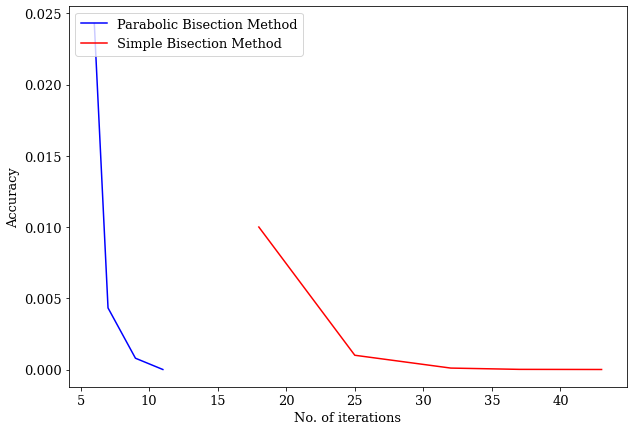

In [156]:

plt.figure(figsize=(10,7))
plt.plot(Nplist, Epslist, 'b', label=r"Parabolic Bisection Method")
plt.plot(iterations_list, Accuracy_list, 'r', label=r"Simple Bisection Method")
plt.legend(loc = 2)
plt.xlabel('No. of iterations')
plt.ylabel('Accuracy')


# We see that the Parabolic Bisection Method reaches the same level of accuracy in SMALLER no. of iterations

# finding the minimum of an arbitrary function : passing a function name as an argument


Now we wish our previous minimization function to be able to minimize any function, and not only the function called "Func_1". So we need to pass the function name as an argument. This is very simple in Python: we can just use an argument called (for example) $func$ and when we call the minimization function,  just pass the name of this funcion (without ' or ") in the variable func.
* Define a python function called Func_2(x) that compute any function of x (for example $f(x)=x^6-x^3$, or anything else you wish)
* Define a python function called 'call_func(f)', that will return f(2) by calling : call_func(Func_2) 

Shows that it works by typing : call_func(Func_2) 

In [157]:
def Func_2(x):
    o = x**6 - x**3
    return o

def call_func(q, f):
    o = f(q)
    return o

call_func(2, Func_2)

56

Finding a minimum :
    plot Func_2 within a range of values of your choice bracketing is a minimum (between 0 and 1 should be enough)

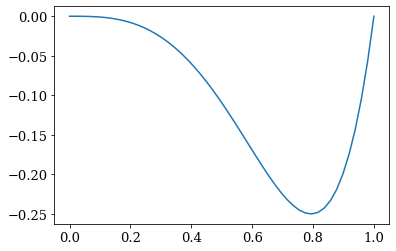

In [158]:
x = np.linspace(0,1,50)

plt.plot(x, Func_2(x))



Build a minimization function of your choice that will accept [x1,x2,x3,Func_2] as an argument and that will find the minimum of Func_2 within [x1,x3]. Try to reuse what you have already coded above

In [159]:
# The function ' Minim_Parab_Func_1 ' as built earlier is already general enough to complete this task

a = 0
b = 0.6     # exactly equally spaced INITIAL intervals always give an answer that is a li'l bit off from the true answer,...
c = 1       # so, we have to use the INITIAL intervals that are of SLIGHTLY different lengths
eps = 1e-6

nmin, acc, it, x1, xval, x3 = Minim_Parab_Func_1(a, b, c, eps, Func_2)

print(f'The value of numerically computed minimum is:       {nmin}  ')
print(f'The accuracy abs(x3-x1) is:                      {acc}  ')
print(f'No. of iterations were:                          {it}  ')
print(f'The value of x at which we found the minima is:  {xval}  ')

The value of numerically computed minimum is:       -0.25  
The accuracy abs(x3-x1) is:                      1.3096995155059687e-08  
No. of iterations were:                          11  
The value of x at which we found the minima is:  0.793700525924133  


# Fitting a model to data: Determining the elimination time of a medicine in the body


We try to determine how long it takes for a medecine to be eliminated from a human body (metabolisation or eliminationin urines). The medicine is injected in a subject, and measurements of the medicine concentration are done regularly during several days. The data are the following. t is the date of all measurements (in minutes, t=0 is the moment of the injection).


In [160]:
t=[0, 1.27202491e+02, 3.14663948e+02, 4.47499292e+02,
       5.77904807e+02, 7.36644162e+02, 8.77944621e+02, 1.03429168e+03,
       1.18319505e+03, 1.33041427e+03, 1.48234442e+03, 1.64547130e+03,
       1.77172013e+03, 1.92313885e+03, 2.07086937e+03, 2.22777241e+03,
       2.37867541e+03, 2.50116573e+03, 2.65833952e+03, 2.82126398e+03,
       2.95786912e+03, 3.10040140e+03, 3.25340147e+03, 3.41529223e+03,
       3.53234880e+03, 3.68589222e+03, 3.85383279e+03, 3.99062701e+03,
       4.11829287e+03, 4.26010451e+03, 4.42751803e+03, 4.57595613e+03,
       4.73240964e+03, 4.87564297e+03, 5.02498239e+03, 5.16407107e+03,
       5.31320580e+03, 5.45634412e+03, 5.61789192e+03, 5.75401807e+03]
t = np.array(t)


The corresponding measured concentration are the following (in arbirary units)

In [161]:
C=[100.,  84.19752483,  79.43669653,  77.49545165,
        64.54338469,  45.67223012,  34.75582205,  36.55283011,
        41.88282264,  28.1426116 ,  21.06445026,  19.8784981 ,
        14.20655088,  13.00527066,  15.21292955,   9.48415543,
         7.86202904,   9.48789641,  12.26344071,   6.86855964,
        14.8847701 ,   0.        ,   9.94703693,   4.97773134,
         8.15232925,   4.48353225,   8.75568603,   1.12007805,
         8.0847839 ,   0.        ,   1.19374786,   0.        ,
        11.38141968,   0.        ,   5.42182953,   0.        ,
         1.69707766,  15.76470042,   3.25146039,   1.46703363]
C = np.array(C)

Plot C(t) with xlabel "minutes" and ylabel "concentration"

Text(0, 0.5, 'concentration (arbitrary units)')

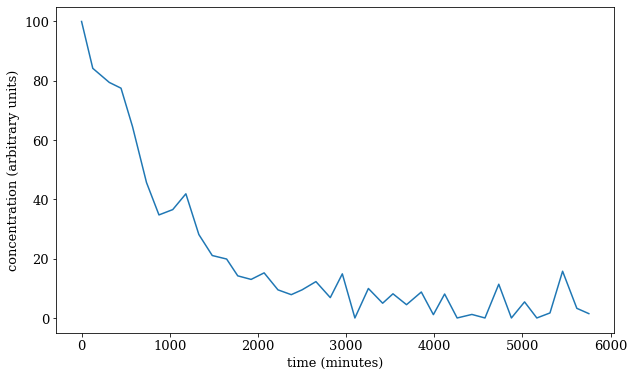

In [162]:
plt.figure(figsize=(10,6))
plt.plot(t,C)
plt.xlabel('time (minutes)')
plt.ylabel('concentration (arbitrary units)')

We assume now that C(t) can be given the form $C(t,\lambda)=100e^{-t/\lambda}$. We try to determine the value of $\lambda$ that best fits the function. In order to do this we will compare different functions (will different values of $\lambda$ with the observation). We define a function called $\chi(\lambda)$ that is a measure of the distance of a model to data. $\chi(\lambda)=\sum_{i=1}^{N} (C_{obs}(t_i)-C_{model}(t_i,\lambda))^2$. The best value of $\lambda$ is the one that minimizes  $\chi(\lambda)$.

* Write a function called $XHI(\lambda)$ that returns $\chi(\lambda)$


In [163]:
def XHI(lamda):
    ct = 100*np.exp(-t/lamda)
    o = np.sum( (C - ct)**2 )
    return o

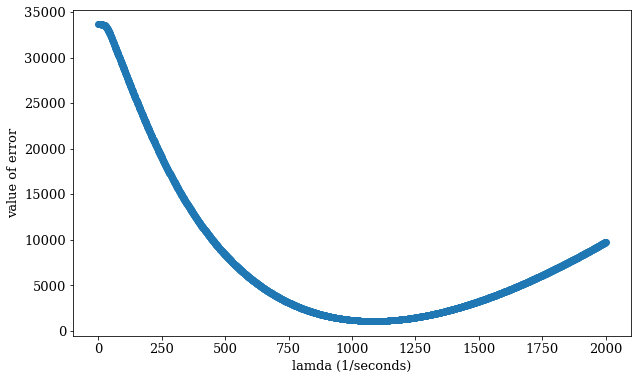

In [164]:
# plotting XHI vs different values of the lamda

m = np.linspace(1,2000,2000)
a = []
for i in range(2000):      # calculating the error for different input values of lamda
    a.append( XHI(m[i]) )


plt.figure(figsize=(10,6))
plt.xlabel('lamda (1/seconds)')
plt.ylabel('value of error')
plt.scatter(m,a)

### From the above graph we see that the minima of XHI is somewhere between 1000 and 1200

Using the functions you have defined above, find $\lambda$

So the first thing to do is do define a function, XHI(lambda) that returns 𝜒(𝜆)

Now minimize XHI(lambda) with a method of your choice and find $\lambda$ . What is the value of XHI at the minimum ? 

In [165]:
# The function ' Minim_Func_1 ' as built earlier is already general enough to complete this task

a = 1000
b = 1100
c = 1200
eps = 1e-4

nmin, acc, it, xval = Minim_Func_1(a, b, c, eps, XHI)

print(f'The value of numerically computed minimum is:       {nmin}  ')
print(f'The accuracy abs(x3-x1) is:                      {acc}  ')
print(f'No. of iterations were:                          {it}  ')
print(f'The value of lamda at which we found the minima is:  {xval}  ')

The value of numerically computed minimum is:       1090.0444435882953  
The accuracy abs(x3-x1) is:                      9.5367431640625e-05  
No. of iterations were:                          38  
The value of lamda at which we found the minima is:  1084.4189167022705  


Text(0, 0.5, 'concentration (arbitrary units)')

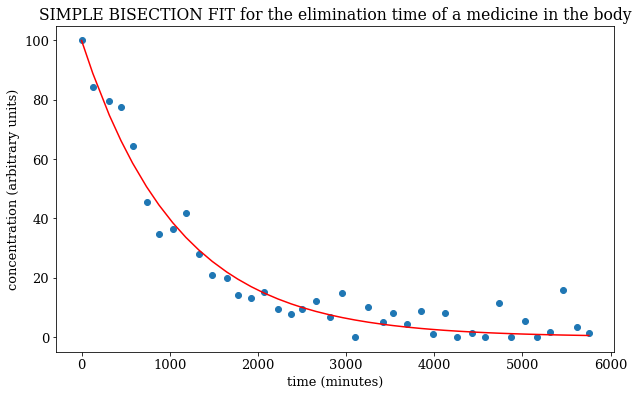

In [166]:
# when lamda = 1090.0444435882953 then our function looks like this:

lamda = 1084.4189167022705 
plt.figure(figsize=(10,6))
plt.plot(t, 100*np.exp(-t/lamda), 'r')
plt.scatter(t,C)
plt.title('SIMPLE BISECTION FIT for the elimination time of a medicine in the body')
plt.xlabel('time (minutes)')
plt.ylabel('concentration (arbitrary units)')

# 2 dimensional minimization

We want to minimize a function f(x,y) and we know that the minimum $(xm,ym)$ is such that $x1<xm<x2$ and $y1<ym<y2$. For example let's minimze the two variable function : $f(x,y)= ((x+y)/(y^2+1)+3xy-1)^2$. First define a function Func_3(x,y) that returns ((x+y)/(y^2+1)+3xy-1)^2.  There is a minimum betwenn -5 and +5 for x and y.


In [167]:
def Func_3(sx,sy):
    a = sx + sy
    b = (sy**2) + 3*sx*sy
    o = (a/b)**2
    return o

If you want to visualise it  (not mandatory) you can use this little procedure that uses triangulation (note : I use a random sampling of X and Y, so the function is not super smooth, but this is an artifact.

def plot2Dfunc(func,x1,x2,y1,y2):
    # input: 
    # func : function name
    # x1,x2 : x range
    # y1,y2 : y range
    #
    
    Npoints=1000 # number of points to sample
    

   
    import matplotlib.pyplot as plt
    import numpy as np


    x=np.linspace(x1,x2,Npoints)
    y=np.linspace(y1,y2,Npoints)
    
    z=np.zeros([Npoints,Npoints])

    for i in range(Npoints):
        # Z[y,x]
        z[i,:]=func(x,y[i])
        
    
    plt.contour(x,y,z,100)
    plt.show()

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np


    x=np.random.uniform(x1,x2,Npoints)
    y=np.random.uniform(y1,y2,Npoints)
    
    z=func(x,y)
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

To use this function, copy and paste the code above in a 'code cell" and type 'plot2Dfunc(Func,-5,5,-5,5) 'for example



Now code a function that find the minimum of Func_3(x,y) using the following strategy.
Knowing that x1<xm<x2 and y1<ym<y2 : 
* start from a point (x0,y0) inside the interval and minimize along the x direction only (i.e. keeping y0=cst) between x1 and x2. Find a new point (x1,y0) closer to the minimum.
* now keep x1 constant and minimize along the y direction only (between y1 and y2). Find a new point (x1,y1) closer to the minimum.
* Redo the two previous steps up to a desired accuracy.
* Note : Re-use any of the functions that you have coded previously.
Find the minimum. How many steps did you do ?


In [169]:
x1 = -5
x2 = +5.1  # we did not take it to be, exactly 5, bcoz then the average of x1 and x3 would ZERO i.e x5 = 0, and that would
           # have resulted in division by zero error in Func_3 and that would have introduced infinities in our calculations

y1 = -5; y2 = +5.1; xm = 0.1; ym = 0.1

# different variables for recording the number of iterations iterations
itx        = 0
itx_Total  = 0
ity        = 0
ity_Total  = 0

global_eps = 1e-5

local_eps  = 1

i = 0

# this the main loop, it'll use 'Minim_Parab_Func_1' for computations
while local_eps > global_eps:
    
    def Func_3x(sx): # keeping y constant i.e. keeping it to be ym
        o = ( (sx + ym) / ( ((ym**2) + 1 ) + 3*sx*ym - 1) )**2
        return o
    
    nmin, acc, itx, x1, xm, x3 = Minim_Parab_Func_1(x1, xm, x2, eps, Func_3x)
    itx_Total = itx_Total + itx


    def Func_3y(sy): # keeping x constant i.e. keeping it to be xm
        o = ( (xm + sy) / ( ((sy**2) + 1 ) + 3*xm*sy - 1) )**2
        return o

    nminy, accy, ity, y1, ym, y3 = Minim_Parab_Func_1(y1, ym, y2, eps, Func_3y)
    ity_Total = ity_Total + ity
    
    
    local_eps = abs( np.sqrt( (y3**2) + (x3**2) ) - np.sqrt( (y1**2) + (x1**2) ) )  #disctance between points (x3,y3) & (x1,y1)
                                                                                    #I think this'll be a better estimate of error
    i = i + 1

# printing the data
print(f'The value of numerically computed minimum (in x direction) is:    {nmin}  ')
print(f'The accuracy abs(x3-x1) is:                                       {acc}  ')
print(f'The value of x at which we found the minima is:                   {xm}  ')
print(f'Total no. of iteration in x were:                                 {itx_Total}')

print('\n\n')

print(f'The value of numerically computed minimum (in y direction) is:    {nminy}  ')
print(f'The accuracy abs(y3-y1) is:                                       {accy}  ')
print(f'The value of y at which we found the minima is:                   {ym}  ')
print(f'Total no. of iteration in y were:                                 {ity_Total}')

print('\n\n')

print(f'Total no. of iteration in x and y were:          {itx_Total + ity_Total}')
print(f'Total no. of iteration of the main loop were:    {i}')



The value of numerically computed minimum (in x direction) is:    4.931845059847468e-12  
The accuracy abs(x3-x1) is:                                       7.703502697270492e-06  
The value of x at which we found the minima is:                   -0.10000045256234345  
Total no. of iteration in x were:                                 20



The value of numerically computed minimum (in y direction) is:    4.931845059847468e-12  
The accuracy abs(y3-y1) is:                                       1.922094205894509e-06  
The value of y at which we found the minima is:                   0.10000040814643572  
Total no. of iteration in y were:                                 14



Total no. of iteration in x and y were:          34
Total no. of iteration of the main loop were:    2
